<a href="https://colab.research.google.com/github/TuckerCullen/national-park-biodiversity/blob/main/Data200_ClimateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup 

In [92]:
from google.colab import drive

drive.mount('/content/gdrive')

!pip install numpy 
!pip install pandas 
!pip install matplotlib
!pip install seaborn 
!pip install geopandas
!pip install scikit-learn

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
ROOT_PATH = '/content/gdrive/MyDrive/Data200ClimateChange/' 

# Import and View Data

There are three main datasets we are working with:

* `parks` contains metadata about each national park (things like `Park Name`, `State`, `Acres`, and lat/long coordinates).
* `species` contains data on every plant and animal species contained in each park
* `visitation` contains the number of annual visitors at each park each year each since 2011 (this dataset was obtained directly from the [NPS IRMA Portal](https://irma.nps.gov/STATS/SSRSReports/National%20Reports/Annual%20Visitation%20By%20Park%20(1979%20-%20Last%20Calendar%20Year))
* `ozone 2021` Parks and the number of days per Month where Ozone Standard Exceedances in National Parks per month in 2021
 [NPS  Portal](https://irma.nps.gov/DataStore/Reference/Profile/2286523)








In [172]:
parks = pd.read_csv(ROOT_PATH + "national_parks_biodiversity_parks.csv")
species = pd.read_csv(ROOT_PATH + "national_parks_biodiversity_species.csv")
visitation = pd.read_csv(ROOT_PATH + "park_visitation.csv")
print()
print("######### parks #########")
display(parks.head())
print()
print("######### species #########")
display(species.head())
print()
print("######### visitation #########")
display(visitation.head())
ozone =  pd.read_csv(ROOT_PATH + "2021-Ozone.csv")
print("######### Ozone Quality in 2021 #########")
display(ozone.head())


######### parks #########


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.



,Park Code,Park Name,State,Acres,Latitude,Longitude
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21
1,ARCH,Arches National Park,UT,76519,38.68,-109.57
2,BADL,Badlands National Park,SD,242756,43.75,-102.50
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08



######### species #########


,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN



######### visitation #########


,Park Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 10,Unnamed: 11,2020,Average
0,Abraham Lincoln Birthplace NHP,"163,568","169,515","163,928","241,264","148,605","252,495","269,580","260,964","238,226",NaN,NaN,"228,141","213,629"
1,Acadia NP,"2,374,645","2,431,052","2,254,922","2,563,129","2,811,184","3,303,393","3,509,271","3,537,575","3,437,286",NaN,NaN,"2,669,034","2,889,149"
2,Adams NHP,"219,975","336,031","285,501","178,468","183,632","199,301","255,562","121,007","187,400",NaN,NaN,"6,937","197,381"
3,African Burial Ground NM,"108,585","77,624","93,234","54,861","56,348","46,526","43,182","45,035","47,427",NaN,NaN,"7,908","58,073"
4,Agate Fossil Beds NM,"11,617","11,824","10,504","12,440","13,264","15,555","32,038","16,238","16,657",NaN,NaN,"8,722","14,886"


######### Ozone Quality in 2021 #########


,Park Code,Park Name,Site,January,February,March,April,May,June,July,August,September,October,November,December,Total,Year
0,ACAD-CM,Acadia National Park,Cadillac Mountain,NaN,0.0,0.0,0.0,0.0,2,0,1,0.0,0.0,NaN,NaN,3,2021
1,ACAD-MH,Acadia National Park,McFarland Hill,0.0,0.0,0.0,0.0,0.0,2,0,0,0.0,0.0,NaN,NaN,2,2021
2,BIBE-KB,Big Bend National Park,K-Bar Ranch Road,0.0,0.0,0.0,0.0,0.0,0,0,0,0.0,0.0,NaN,NaN,0,2021
3,CACO,Cape Cod,NaN,0.0,0.0,0.0,0.0,0.0,2,0,1,0.0,0.0,NaN,NaN,3,2021
4,CANY-IS,Canyonlands National Park,Island in the Sky,0.0,0.0,0.0,0.0,0.0,0,0,2,0.0,0.0,NaN,NaN,2,2021


Variable Description 

In [173]:
species["Scientific Name"].value_counts()

Falco peregrinus                   56
Circus cyaneus                     55
Tachycineta bicolor                54
Pandion haliaetus                  54
Accipiter striatus                 54
                                   ..
Leptonia vetulina                   1
Veromessor smithi                   1
Aster simplex var. ramosissimus     1
Fleischmannia pycnocephala          1
Microarthridion littorale           1
Name: Scientific Name, Length: 46022, dtype: int64


**Parks Data set**

Variable       | Description
-------------- | ------------------------------------------------------------------
Park Code | National Park Service unique code for each Park 
Park Name  | The official name for each Park 
State | US state where the park is located 
Acres | Size of the park in acres
Latitude | Latitude of the park (centroid)
Longitude | Longitude of the park (centroid)





**Species Data Set**

Variable       | Description
-------------- | ------------------------------------------------------------------
Species ID | National Park Servies park code 
Park Name  | Park where the species is found
Category | The type of category the species belongs to
Order | Scientific order the species belongs to
Family | Scientific family the species belongs to 
Scientific Name | The full scientific name of the specie 
Common Names | Usual common names for the specie 
Record Status | The record status of the specie 
Occurrence | Whether or not the presence of the species has been confirmed
Nativeness | Whether the species is native from the are or not native/invasive
Abundance | Commonality of sightseeing 
Seasonality | When the species can be found in the park 
Conservation | IUCN species conservation status 

**Visitation Data Set**

Variable       | Description
-------------- | ------------------------------------------------------------------
Park Name  | Park where the species is found
2011 - 2019 | Total visitation per year 
Average | Average of visitation from 2011 -2019 in each park 

**Ozone Data Set**

Variable       | Description
-------------- | ------------------------------------------------------------------
Park Code | National Park Service unique code for each Park 
Park Name  | The official name for each Park 
Site | Site where the Air Quality was measured 
January - December | Monthly summaries of ozone exceedance days 
Total | Sum of Monthly summaries of ozone exceedance days 


**Granularity of the data set**




**Parks Data Set**: For this data set each row represents a National Park and the physical characteristics it has  

**Species Data Set**: For this data set each row represents an individual species and its characteristics, which includes in what National Park it is found. 

**Visitation Data Set** : For this data set each row represents a National Park and the visitation it has per year

**Ozone Data Set** For this data set each row represents a National Parks and the ozone exceeds it had per month and a total summary 





## Zooming in on Yosemite

Breaking down species status in one single park to better understand the data. 

First, extract just rows from Yosemite and columns of interest: 

In [174]:
yosemite_species = species[species["Park Name"] == "Yosemite National Park"][["Scientific Name", "Occurrence", "Record Status", "Common Names", "Conservation Status"]]
yosemite_species

,Scientific Name,Occurrence,Record Status,Common Names,Conservation Status
115364,Ovis canadensis sierrae,Present,Approved,Sierra Nevada Bighorn Sheep,Endangered
115365,Cervus nannodes,Not Present (Historical Report),In Review,None,NaN
115366,Odocoileus hemionus,Present,Approved,"Mule Deer, Mule Deer",NaN
115367,Sus scrofa,Not Confirmed,Approved,"Pig, Pig (Feral), Wild Boar, Wild Boar",NaN
115368,Canis latrans,Present,Approved,Coyote,Species of Concern
...,...,...,...,...,...
117447,Solanum parishii,Present,Approved,Parish's Nightshade,NaN
117448,Solanum xanti,Present,Approved,"Chaparral Nightshade, Purple Nightshade",NaN
117449,Parthenocissus vitacea,Present,Approved,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
117450,Vitis californica,Present,Approved,"California Grape, California Wild Grape",NaN


Next, we examine how many species are of each designation. The majority of species have a status of NaN, which means that they do not have any sort of "at-risk" status. We use "at-risk" status to refer to all of: "Species of Concern", "Threatened", and "Endangered". 

In [175]:
yosemite_conservation_status = yosemite_species["Conservation Status"].value_counts(dropna=False)
yosemite_conservation_status

NaN                   1992
Species of Concern      81
Threatened               5
Endangered               4
Under Review             4
In Recovery              2
Name: Conservation Status, dtype: int64

We also check the "Occurrence" status of each species in the park. The dataset contains species that are not confirmed to actually be in a given park, are no longer found in a given park, or were incorrectly reported to be found in the park. We only want to look at species whose "Occurrence" is "Present", meaning that they are actively present in the park. In the case of Yosemite, there are 109 not confirmed species, 28 falsely reported species, and 17 species that once exsisted in the park but are not longer found there. We will want to remove all such species. 

In [176]:
yosemite_occurrence = yosemite_species["Occurrence"].value_counts(dropna=False)
yosemite_occurrence

Present                            1905
Not Confirmed                       109
NaN                                  29
Not Present (False Report)           28
Not Present (Historical Report)      17
Name: Occurrence, dtype: int64

# Data Cleaning 

### Removing Unconfirmed Species 

As we found in our exploration of Yosemite species, there are some species in the dataset for each park that aren't actually confirmed to presently exist in the park. We want to remove these species. We only want to keep the species that are designated as "Present" or "Approved". 

In [177]:
species["Occurrence"].value_counts(dropna=False)

Present                            83278
NaN                                20142
Not Confirmed                      11958
Not Present (False Report)          2072
Not Present (Historical Report)     1310
Not Present                          431
Approved                              51
In Review                              6
Name: Occurrence, dtype: int64

In [178]:
species = species[(species["Occurrence"] == "Present") | (species["Occurrence"] == "Approved")]

### Standardize Park Naming 



We want to remove repeating titles such as "National Park", "NP", "NM", etc from the park name columns. This is helpful for two reasons: (1) it removes clutter in visualizations and (2) it allows us to merge the `visitation` data with the `parks` data

In [179]:
#Rename Unit to Park Name
ozone = ozone.rename(columns={'Unit':'Park Name'})
# regex strings cover all combinations of park designations (i.e. NM, NP, National Park and Preserve, etc.)
replace_list = [r"National Park.*", r"N[A-Z].*"]

# apply to parks dataset 
parks["Park Name"] = parks["Park Name"].str.replace('|'.join(replace_list), '', regex=True)
# apply to species dataset 
species["Park Name"] = species["Park Name"].str.replace('|'.join(replace_list), '', regex=True)
# apply to ozone dataset 
ozone['Park Name'] = ozone["Park Name"].str.replace('|'.join(replace_list), '', regex=True)

# the visitation dataset contains quite a few rows and columns consisting entirely of NaN values, which we want to remove
visitation = visitation.dropna(how="all", axis=1)
visitation = visitation.dropna(how="all", axis=0)

# visitation dataset also has some special case renaming that must happen
visitation_replace = {"Wrangell-St. Elias NP & PRES" : "Wrangell - St Elias ", "Gates of the Arctic NP & PRES" : "Gates Of The Arctic "}
visitation["Park Name"] = visitation["Park Name"].replace(visitation_replace)

visitation["Park Name"] = visitation["Park Name"].str.replace('|'.join(replace_list), '', regex=True)

visitation["Park Name"]

0      Abraham Lincoln Birthplace 
1                          Acadia 
2                           Adams 
3           African Burial Ground 
4               Agate Fossil Beds 
                  ...             
378                       Wupatki 
379                   Yellowstone 
380                      Yosemite 
381          Yukon-Charley Rivers 
382                          Zion 
Name: Park Name, Length: 383, dtype: object

In [180]:
visitation[visitation["Park Name"] == "Gates Of The Arctic "]

,Park Name,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Average
137,Gates Of The Arctic,"11,623","10,899","11,012","12,669","10,745","10,047","11,177","9,591","10,518","2,872","10,115"


# Exploratory Data Analysis & Feature Engineering

## Variable Distributions
Analizing the variable distribution, missing values and outliers


### Park Size Distribution

(array([42.,  5.,  2.,  2.,  2.,  1.,  0.,  0.,  0.,  2.]),
 array([5.5500000e+03, 8.3730980e+05, 1.6690696e+06, 2.5008294e+06,
        3.3325892e+06, 4.1643490e+06, 4.9961088e+06, 5.8278686e+06,
        6.6596284e+06, 7.4913882e+06, 8.3231480e+06]),
 <a list of 10 Patch objects>)

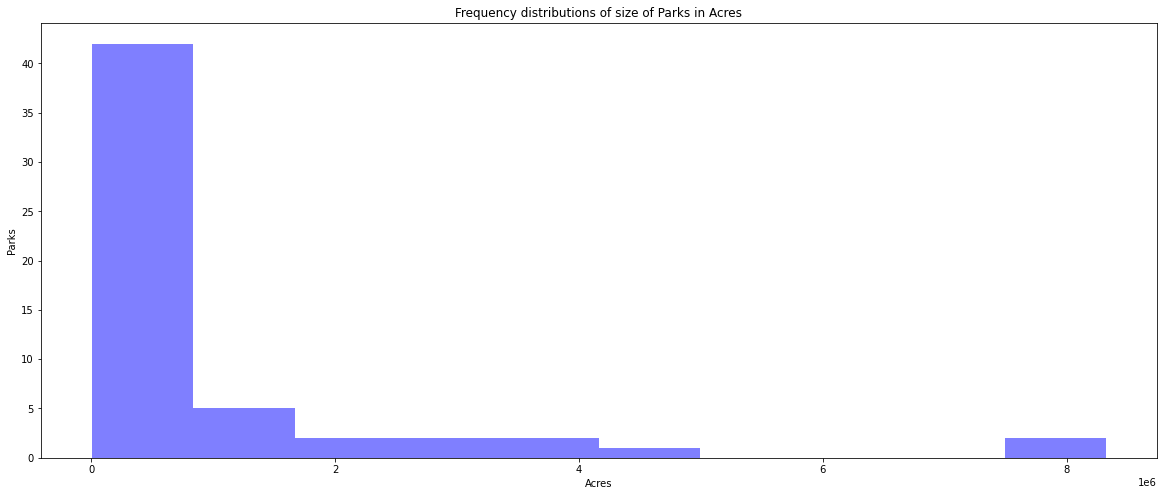

In [181]:
plt.figure(figsize=(20, 8))
plt.xlabel('Acres')
plt.ylabel('Parks')
plt.title('Frequency distributions of size of Parks in Acres')
plt.hist(parks['Acres'], facecolor='blue', alpha=0.5 )

In this chart we are able to visualize that most park's size range from 0-1 million acres and there are some outliers which are bigger than most parks. We are able to observe that there are some parks which are quite large and measure around 8 acres.

In [182]:
# plot bar chart to demostrate the size of each park in acres
parks_sorted_by_acres = parks[["Park Name", "Acres"]].sort_values(by="Acres", ascending=False)
fig = px.bar(parks_sorted_by_acres, x="Park Name", y="Acres")
fig.show()

In this bar plot graph, we are able to see specifically which are the outliers.  Wrangell-St. Elias National Park & Preserve is located in Alaska which is the largest national park in the United States. We can also see a couple of other outliers in our data set which is the Gates of the Artic (which is also located in Alaska) and Death of the Valley which is a desert located near Las Vegas.

### Species Distribution

Population of plants distribution

In [183]:
species_by_category_size = species.groupby('Category').size()
plants_size = species_by_category_size[["Algae", "Fungi", "Nonvascular Plant", "Vascular Plant"]]
fig = px.bar(plants_size, y=plants_size.values, x=plants_size.index, 
              labels={
                     "x": "Type of Plants",
                     "y": "Population",
                 }, 
             color=plants_size.index, title='Population of Plants')
fig.show()

In this bar chart we are able to see which are the most dominant types of plants in the national parks. We see that Vascular Plants are the most common types by far. 


In [184]:
#Distribution of the population of Animals in the national parks 
animal_size = species_by_category_size[["Amphibian", "Bird", "Crab/Lobster/Shrimp", "Fish", "Insect", "Invertebrate", "Mammal", "Reptile", "Slug/Snail", "Spider/Scorpion"]]
fig = px.bar(animal_size, y=animal_size.values, x=animal_size.index, color=animal_size.index, 
             labels={
                     "x": "Type of Animals",
                     "y": "Population",
                 },
             title='Population of Animals')
fig.show()

Here we see that there are more different species of birds and insects compared to other types of animals. 

In [185]:
species['Conservation Status'].value_counts(dropna = False)

NaN                    79689
Species of Concern      3101
Endangered               190
Under Review             127
Threatened               123
In Recovery               66
Proposed Endangered       16
Breeder                    7
Resident                   5
Proposed Threatened        3
Migratory                  2
Name: Conservation Status, dtype: int64

Here we can observe that the conservation status values contain more NaN than specified values. There are 96% of missing values for this column. In this case NaNs mean that the species is not at-risk in any way.

In [186]:
species['Seasonality'].value_counts(dropna = False)

NaN                                     63452
Breeder                                 12181
Resident                                 3110
Migratory                                2794
Vagrant                                  1549
Breeder, Winter                            64
Rare                                       35
Summer                                     26
Migratory, Winter                          24
Winter                                     20
Breeder, Resident                          20
Breeder, Migratory                         13
Resident, Winter                            9
Uncommon                                    5
Migratory, Vagrant                          4
Common                                      4
Summer, Vagrant                             3
Breeder, Resident, Summer                   3
Unknown                                     3
Migratory, Summer                           3
Breeder, Summer                             2
Resident, Summer                  

Seasonality in this column has also a lot of missing values. But in this case the blank values represent that the specie that is found in the park all year long. 


## Assigning Our Own Category Labels 

Here we assigned each park to one of four broad biome categories: “Tropical”, “Desert”, “Alpine”, and “Forested”. To determine each park’s classification, we referenced information on the NPS website and location data. Of course, some parks span multiple biomes and as such their classifications were ambiguous. This feature was purely used as a benchmark to visually compare our expected categories with the clusters assigned via our k-means model. It was not used as a feature in any of our models. 

Desert, Alpine, Forested, Tropical 

Parks tough to classify:
* Channel Islands - A set of islands isolated off the coast of Southern California, the channel islands have a very unique ecosystem that does not fit well into any of our categories. We classified it as a desert park, since it lacks much forest or alpine environments. It is also fairly dry (unlike tropical parks). However it contains more plant life than a tradiational "desert" and conatins many marine species. 

* Great Basin - while the lower park elevations consist of desert ecosystems, the park is largely known for its alpine environments so we classified it as alpine. 
* Haleakala and Hawaii Volcanoes - both these parks have both tropical rainforest and alpine complonents. However since most of the biodiversity found in the park is found in the tropical zones we classified them as tropical


In [187]:
parks_categories = {'Acadia ': "Forested",
 'Arches ': "Desert",
 'Badlands ': "Desert",
 'Big Bend ': "Desert",
 'Biscayne ': "Tropical",
 'Black Canyon of the Gunnison ': "Desert",
 'Bryce Canyon ': "Desert",
 'Canyonlands ': "Desert",
 'Capitol Reef ': "Desert",
 'Carlsbad Caverns ': "Desert",
 'Channel Islands ': "Desert",
 'Congaree ': "Forested",
 'Crater Lake ': "Alpine",
 'Cuyahoga Valley ': "Forested",
 'Death Valley ': "Desert",
 'Denali ': "Alpine",
 'Dry Tortugas ': "Tropical",
 'Everglades ': "Tropical",
 'Gates Of The Arctic ': "Alpine",
 'Glacier ': "Alpine",
 'Glacier Bay ': "Alpine",
 'Grand Canyon ': "Desert",
 'Grand Teton ': "Alpine",
 'Great Basin ': "Alpine",
 'Great Sand Dunes ': "Alpine",
 'Great Smoky Mountains ': "Forested",
 'Guadalupe Mountains ': "Desert",
 'Haleakala ': "Tropical",
 'Hawaii Volcanoes ': "Tropical",
 'Hot Springs ': "Forested",
 'Isle Royale ': "Forested",
 'Joshua Tree ': "Desert",
 'Katmai ': "Alpine",
 'Kenai Fjords ': "Alpine",
 'Kobuk Valley ': "Alpine",
 'Lake Clark ': "Alpine",
 'Lassen Volcanic ': "Alpine",
 'Mammoth Cave ': "Forested",
 'Mesa Verde ': "Desert",
 'Mount Rainier ': "Alpine",
 'North Cascades ': "Alpine",
 'Olympic ': "Alpine",
 'Petrified Forest ': "Desert",
 'Pinnacles ': "Desert",
 'Redwood ': "Forested",
 'Rocky Mountain ': "Alpine",
 'Saguaro ': "Desert",
 'Sequoia and Kings Canyon ': "Alpine",
 'Shenandoah ': "Forested",
 'Theodore Roosevelt ': "Desert",
 'Voyageurs ': "Forested",
 'Wind Cave ': "Forested",
 'Wrangell - St Elias ': "Alpine",
 'Yellowstone ': "Forested",
 'Yosemite ': "Alpine",
 'Zion ': "Desert"}

parks["Park_Type"] = parks["Park Name"].map(parks_categories)
parks["Park_Type"].value_counts()

Alpine      20
Desert      19
Forested    12
Tropical     5
Name: Park_Type, dtype: int64

In [188]:
fig = px.scatter_geo(parks, 
                     locationmode="USA-states",
                     lat = "Latitude",
                     lon="Longitude",
                     text="Park Name",
                     color="Park_Type",
                     scope="usa",
                     color_discrete_sequence=["#158f00", "#fa6000", "#00d7eb", "#32328b"],
                     title="Map of US National Parks by Type"
                     )

fig.update_traces(marker=dict(size=7)),
fig.update_layout(title={
        'text': "Map of US National Parks by Type",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'}
        )
fig.update_geos(
    resolution=50,
    showland=True, landcolor="#f9f1ec",
    showocean=False, oceancolor="#d6e9f8",
    showlakes=True, lakecolor="#d6e9f8",
    showrivers=True, rivercolor="#d6e9f8"
)
fig.show()

## Species per Acre

To better compare biodiversity accross various parks, we want to normalize by park size. Since it would not be reasonable to directly compare the number of species in a massive park like Wrangell-St. Elias with a smaller park like Mesa Verde. 

To do this, first we count the number of species in each park:

In [189]:
species_per_park = species[["Park Name", "Scientific Name"]].groupby("Park Name", as_index=False).count()
species_per_park = species_per_park.rename(columns={"Scientific Name" : "Num_Species"})
species_per_park.head()

,Park Name,Num_Species
0,Acadia,1173
1,Arches,750
2,Badlands,910
3,Big Bend,2011
4,Biscayne,1331


Then we divide by the acreage in each park and plot the number of species per acre:

,Park Name,Species_Per_Acre
29,Hot Springs,0.122523
11,Congaree,0.078995
27,Haleakala,0.071767
13,Cuyahoga Valley,0.054234
43,Pinnacles,0.048147


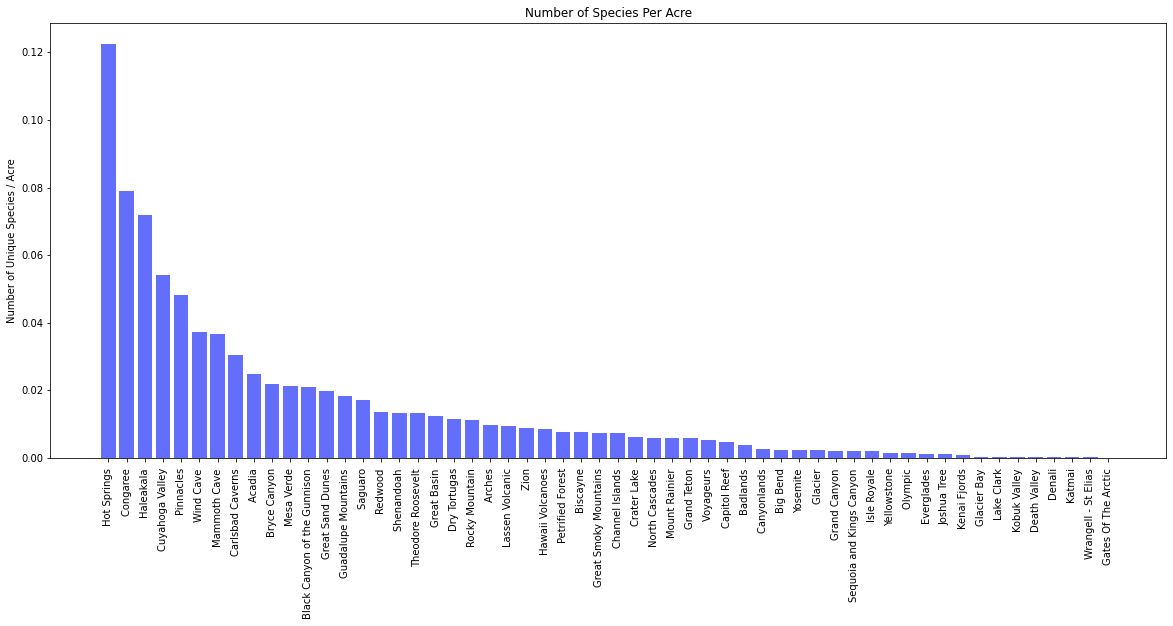

In [190]:
# Merge the number of species per park calculated above, and standardize it by dividing by acreage
species_per_acre = parks.merge(species_per_park, on=["Park Name", "Park Name"])
species_per_acre["Species_Per_Acre"] = species_per_acre["Num_Species"] / species_per_acre["Acres"]
species_per_acre = species_per_acre[["Park Name", "Species_Per_Acre"]]
species_per_acre = species_per_acre.sort_values("Species_Per_Acre", ascending=False)
display(species_per_acre.head())

# plot bar chart of number of species per acre: 
plt.figure(figsize=(20, 8))
plt.bar(x=species_per_acre["Park Name"],
        height=species_per_acre["Species_Per_Acre"], color='#636EFA'
        )
plt.xticks(rotation='vertical');
plt.title("Number of Species Per Acre")
plt.ylabel("Number of Unique Species / Acre");


This bar chart provides us with a few interesting insights. For one, it is clear that parks located in more northern climates such as Denali, Kenai Fjords, and Gates of the Artic have fairly low biodiversity per acre. The same can be said for parks with a primarily desert ecosystem such as Joshua Tree and Death Valley. Parks in the tropics such as Haleakala or Congaree generally have higher biodiversity per acre. However, it also appears that exceptionally small parks such as Hot Springs NP (which is less than 6000 acreas) somewhat skews this metric. Since a small park in a very biodiverse region might contain roughly the same number of species as a larger park within that same region, but the small park would have a much larger num_species/acre score.  

## Percentage At-Risk Species Per Park

In order to get a better idea of what parks are most in danger of biodiversity loss, we calculate the percentage of species in a park that are "at-risk". We use the term at-risk to refer to any species with a conservation status indicating that the species' numbers are below the level indicative of a healthy population. This includes "Species of Concern", "Threatened", "Endangered", etc. 

We start by extracting all the species that are at risk and looking at how many of each designation there are. "Species of Concern" is by far the most common at-risk designation in the dataset. 

In [191]:
types_of_at_risk = ["Species of Concern", "Endangered", "Threatened", "In Recovery", "Proposed Endangered", "Proposed Threatened", "Extinct"]
at_risk_species = species[species["Conservation Status"].str.contains("|".join(types_of_at_risk), na=False)]
at_risk_species["Conservation Status"].value_counts()

Species of Concern     3101
Endangered              190
Threatened              123
In Recovery              66
Proposed Endangered      16
Proposed Threatened       3
Name: Conservation Status, dtype: int64

Next we determine the number of species that are at-risk in each park:

In [192]:
at_risk_per_park = at_risk_species[["Park Name", "Scientific Name"]].groupby("Park Name").count()
at_risk_per_park = at_risk_per_park.rename(columns={"Scientific Name" : "Num_At_Risk"})
at_risk_per_park.head()

,Num_At_Risk
Park Name,
Acadia,48
Arches,52
Badlands,56
Big Bend,128
Biscayne,59


Then we divide the total number of species in each park by the number of at risk species:

In [193]:
percent_at_risk_per_park = species_per_park.join(at_risk_per_park, on="Park Name")
percent_at_risk_per_park["Percent_At_Risk"] = percent_at_risk_per_park["Num_At_Risk"] / percent_at_risk_per_park["Num_Species"]
percent_at_risk_per_park = percent_at_risk_per_park.sort_values("Percent_At_Risk", ascending=False)
percent_at_risk_per_park.head()

,Park Name,Num_Species,Num_At_Risk,Percent_At_Risk
31,Joshua Tree,862,79,0.091647
42,Petrified Forest,734,63,0.085831
7,Canyonlands,866,68,0.078522
5,Black Canyon of the Gunnison,689,51,0.074020
10,Channel Islands,1847,136,0.073633


Finally we graph the percentage of species that are at-risk at each park:

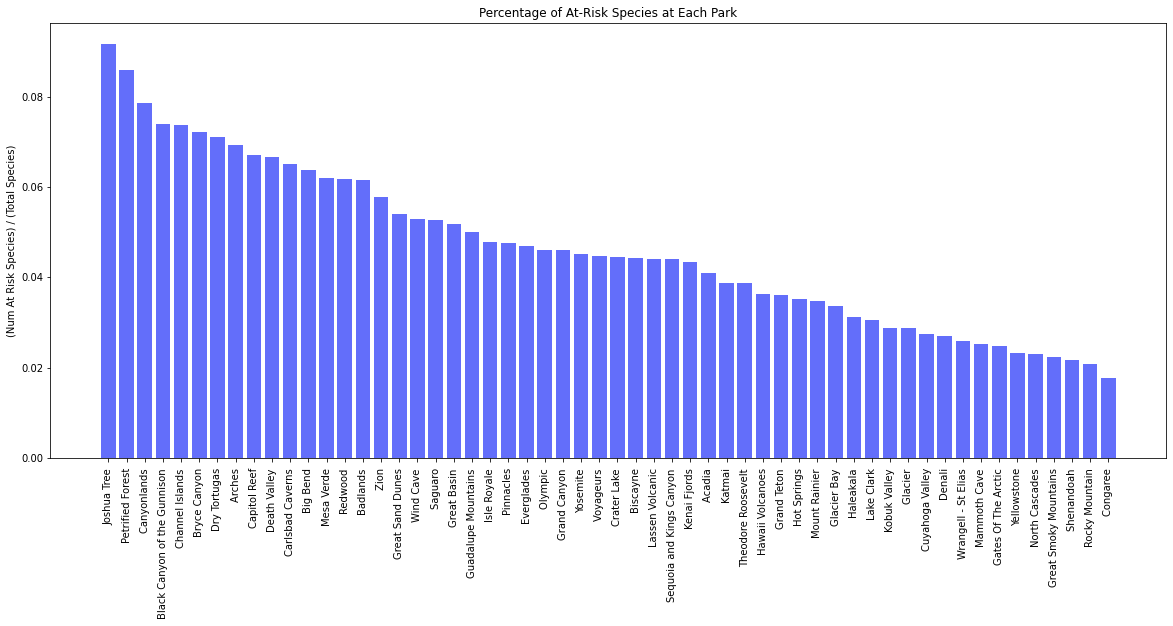

In [194]:
plt.figure(figsize=(20, 8))
plt.bar(x=percent_at_risk_per_park["Park Name"],
        height=percent_at_risk_per_park["Percent_At_Risk"],
        color='#636EFA'
        )
plt.xticks(rotation='vertical');
plt.title("Percentage of At-Risk Species at Each Park")
plt.ylabel("(Num At Risk Species) / (Total Species)");

It appears that parks located primarily in the desert tend to have a larger percentage of at-risk species than others. The three parks with the higher percentage of at-risk species, Joshua Tree, Petrified Forest, and Canyonlands are all found in the deserts of the southwestern United States.  




## Visitation Per Park

In [195]:
avg_visitation = visitation[["Park Name", "Average"]]

avg_visitation = parks.merge(avg_visitation, on="Park Name", how="left")
avg_visitation = avg_visitation.rename(columns={'Average':'AVG_Visitation'})
avg_visitation['AVG_Visitation'] = avg_visitation['AVG_Visitation'].str.replace(',','')
avg_visitation['AVG_Visitation'] = pd.to_numeric(avg_visitation['AVG_Visitation'])
avg_visitation.dropna(inplace=True)
avg_visitation = avg_visitation[["Park Name", "AVG_Visitation"]]
avg_visitation = avg_visitation.sort_values('AVG_Visitation', ascending=False)
avg_visitation.head()

,Park Name,AVG_Visitation
24,Great Smoky Mountains,10757765.0
22,Grand Canyon,5103793.0
54,Yosemite,3959522.0
45,Rocky Mountain,3850891.0
53,Yellowstone,3795657.0


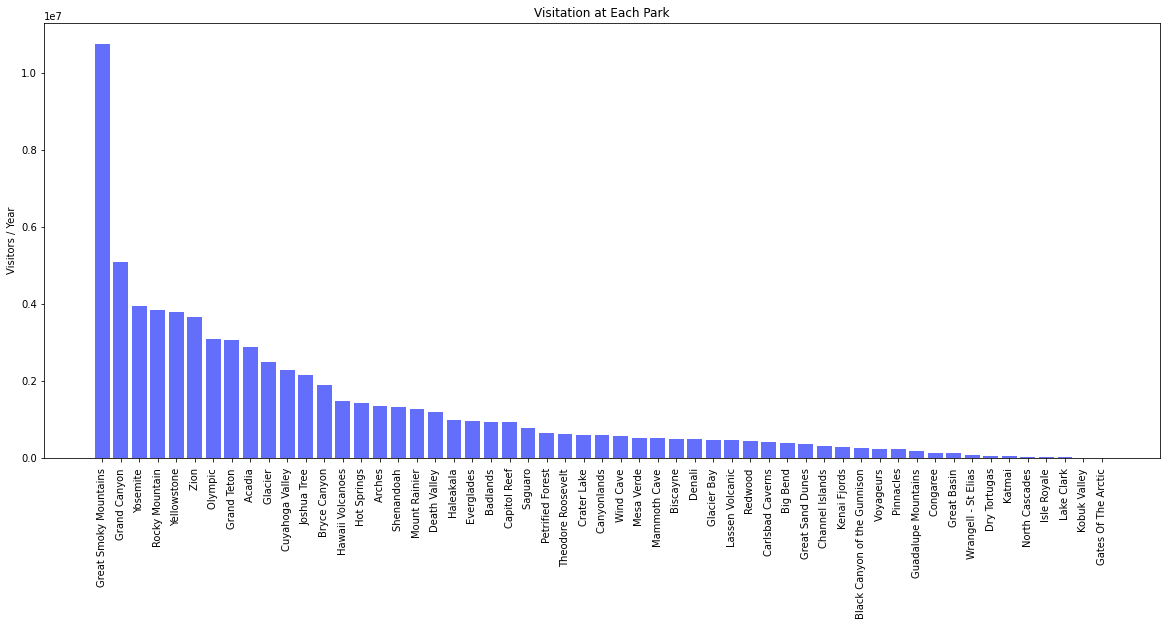

In [196]:
plt.figure(figsize=(20, 8))
plt.bar(x=avg_visitation["Park Name"],
        height=avg_visitation["AVG_Visitation"],
        color='#636EFA'
        )
plt.xticks(rotation='vertical');
plt.title("Visitation at Each Park")
plt.ylabel("Visitors / Year");

In the bar graph plotted above the visitation in each park is mapped having quite an outlier which is the Great Smoky Mountain having the most visitation through the years. This makes sense as this a National Park that it is located in the center of the country making it quite accesible for all of the states to visit this National Park. It is also insightful since the least visitated parks are in Alaska, which makes sense since Alaska is quite distanced from the rest of the states. 

## Mapping the Parks based on the days which exceeded the Ozone standard Quality in 2021

We decided to plot the number of days where the ozone standard quality  was exceeded in order to visualize the distribution of these days in a geographical map. 



In [197]:
#Merge Visitation, ozone and Parks 
ozone_visitation = visitation.merge(ozone, on='Park Name')
ozone_visitation_park_data = ozone_visitation.merge(parks,on='Park Name')
ozone_visitation_park_data = ozone_visitation_park_data.merge(avg_visitation, how='left', on="Park Name")

In [198]:
#Keep the relevant data 
ozone_visitation_parks = ozone_visitation_park_data[['Park Name', 'Total', 'Acres', 'AVG_Visitation', 'State', 'Latitude', 'Longitude']]
ozone_visitation_parks.head(2)

,Park Name,Total,Acres,AVG_Visitation,State,Latitude,Longitude
0,Acadia,3,47390,2889149.0,ME,44.35,-68.21
1,Acadia,2,47390,2889149.0,ME,44.35,-68.21


Plot of a map where we can hover over each Park and see their particular data for each park.  The color and size of each square represents how many days each park had where the ozone exceeded the healthy levels.

In [199]:
ozone_visitation_parks['text'] = ozone_visitation_parks['Park Name'] + '' + + ozone_visitation_parks['State'].astype(str) + ' Size in Acres ' + ozone_visitation_parks['Acres'].astype(str) + '   Avg Visitation: '+ ozone_visitation_parks['AVG_Visitation'].astype(str) + '   Total Days: '+ ozone_visitation_parks['Total'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = ozone_visitation_parks['Longitude'],
        lat = ozone_visitation_parks['Latitude'],
        text = ozone_visitation_parks['text'],
        mode = 'markers',
        marker = dict(
            size = ozone_visitation_parks['Total'],
            sizemin=4,
            opacity = 0.8,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='black'
            ),
            colorscale = 'Reds',
            cmin = 0,
            color = ozone_visitation_parks['Total'],
            cmax = ozone_visitation_parks['Total'].max(),
            colorbar_title="Number of days where ozone levels have exceeded the standard in 2021"
        )))

fig.update_layout(
        title = 'Hover for Data of each park',
           geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        )
    )
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In this map we are able to spot that the days of bad ozone show an interesting relationship with Latitude. There are a couple of insights we are able to see the lower in latitude squares such as Yosemite, Carlsband Caverns, Rocky Mountains are lower in the United States and have more days of lower air quality. Although this is not the rule, further exploration needs to be performed since there are other National Parks such as Petrified Forest who only has one day of bad air quality. 


## Species at Risk vs Ozone Days by Park Type


In [200]:
#Keep relevant data 
ozone_risk_latitude = ozone_visitation_park_data[['Park Name', 'Total', 'Park_Type']]

#Merge the number at risk species 
ozone_risk_latitude = ozone_risk_latitude.merge(percent_at_risk_per_park, on='Park Name') 
ozone_risk_latitude.head(2)

,Park Name,Total,Park_Type,Num_Species,Num_At_Risk,Percent_At_Risk
0,Acadia,3,Forested,1173,48,0.040921
1,Acadia,2,Forested,1173,48,0.040921


In [201]:
#Since this data is collected at each site and there are a couple of sites that have several data, we keep the first 
ozone_risk_latitude['Park Name'] = ozone_risk_latitude['Park Name'].drop_duplicates(keep='first')

fig = px.scatter(ozone_risk_latitude, x="Park Name", y="Total", size="Percent_At_Risk", color="Park_Type" , 
                 labels = {'Total': 'Total Days with unhealthy ozone'},
                 size_max=40) 
fig.show()

In this graph a relationship between the total days of unhealthy ozone and the percent of species at risk is portrayed. We can take some interesting insights from this graph. The first one is that Forested National Parks have lesser days with unhealthy ozone. The second one is that National Parks classified as deserts have evidential more species at risk than the other two categories. Lastly some of the outliers are displayed such as Joshua for the  park with the most poor ozone days and also the highest percert of species at risk.

## Analyze which month has more days with bad days of ozone 

Since we have a summary of days with exceeded ozone and we decided to map the months in which are the months with the most terrible air quality.

In [202]:
ozone_melt = pd.melt(ozone_visitation_park_data, id_vars =['Park Name'], value_vars =['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ozone_melt = ozone_melt.rename(columns={'variable': 'Month'})
ozone_melt = ozone_melt.groupby('Month').sum()

fig = px.bar(ozone_melt, x=ozone_melt.index, y="value", color=ozone_melt.index,
                 title="Total Days with unhealthy ozone by Month",
                 labels={"x": "Months", 
                         "value": 'Total Days with unhealthy ozone'} 
                )

fig.show()

Given our data set we are able to identify that the months in the summer June, July and August are the ones with the worst air quality. 

## Non-native vs native species per park 






Explore Nativeness of creatures



In [203]:
species['Nativeness'].value_counts()

Native           64502
Not Native        8694
Unknown           5772
Present             47
Not Confirmed        4
Name: Nativeness, dtype: int64

In [204]:
new_species = species[(species['Nativeness'] != 'Unknown')&(species['Nativeness'] != 'Not Confirmed')]
new_species['Nativeness'].value_counts()

Native        64502
Not Native     8694
Present          47
Name: Nativeness, dtype: int64

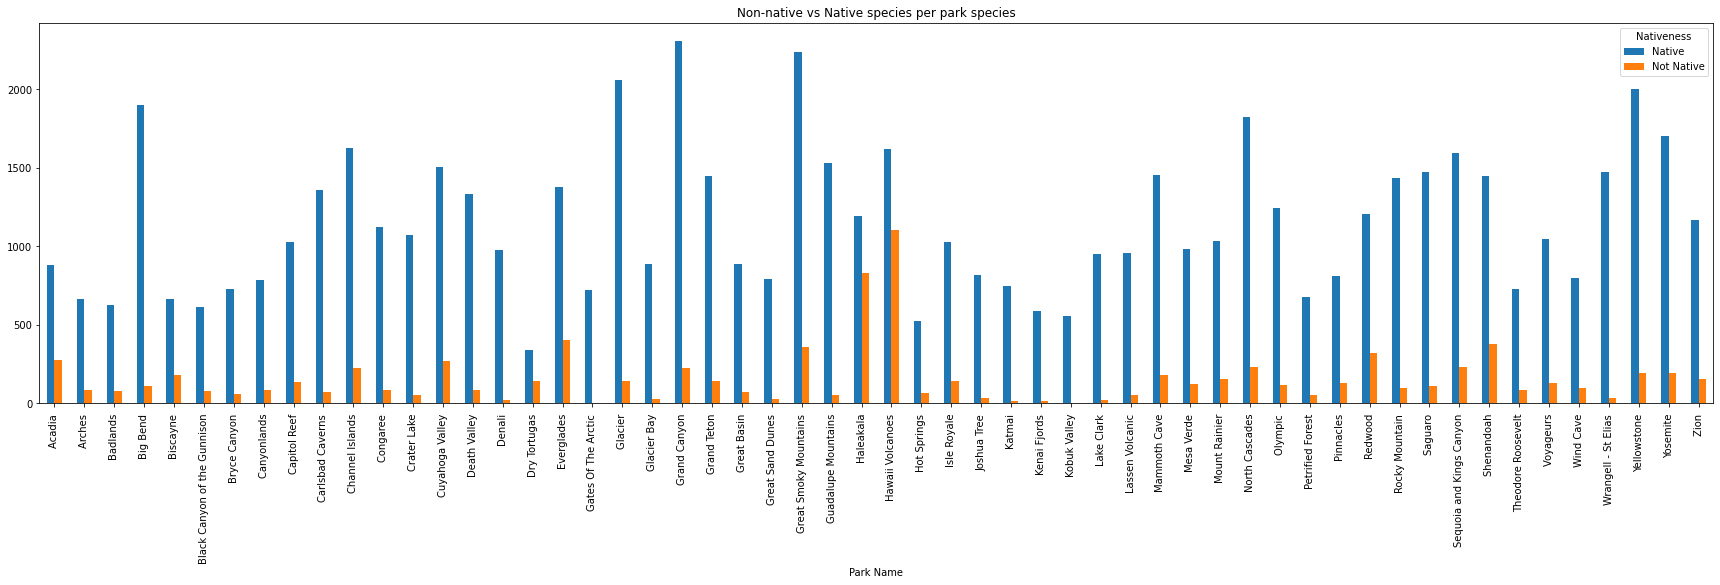

In [205]:

fig, ax = plt.subplots(figsize=(30,7))
ax.set_title('Non-native vs Native species per park species')
t_species = new_species.groupby(['Park Name','Nativeness']).size().unstack().reset_index().plot.bar(x = 'Park Name', y = ['Native', 'Not Native'], ax=ax)


In this graph we plotted out how each national park is species is populated. We can see from this graph that the predominant nativeness in all of the parks is the native specie.

In [206]:
native_prop = new_species[new_species['Nativeness']=='Native'].groupby('Park Name').size()/new_species.groupby('Park Name').size()
native_prop = pd.DataFrame(native_prop, columns=['Native_Proportion'])
native_prop.reset_index(inplace = True)
native_prop = native_prop.sort_values(by="Native_Proportion", ascending=False)


fig = px.bar(native_prop, x="Park Name", y="Native_Proportion", title="Proportion of Species in Each Park that are Native")
fig.show()

The bar graph presented above demostrates which are the parks with the highest native proportion and which are the least, taking the intresting insight that the parks with the most nativeness are the parks located in Alaska.

## Types of Species in Each Park 

The population of these parks is made up of both plants and animals. To get a better understanding of the population in each park we decided to create this feature which determines which percentage of the population of the park are animals.

In [207]:
species_categories = species[["Park Name", "Category"]]
species_categories = species_categories.groupby([ "Park Name", "Category"]).size()
species_categories = species_categories.reset_index()
species_categories = species_categories.rename({0 : "Count"}, axis=1)

fig = px.bar(species_categories, x="Park Name", y="Count", color="Category", title ="Count of species by category", labels = {'Count': 'Count of Species'})
fig.show()


The particular insight of this graph is the midlle area as we are able to identify that vascular plants are the most dominant category acress the parks.

Determine animal vs plants population

In [209]:
plants_vs_animals = species[["Park Name", "Category"]]
plants_vs_animals = plants_vs_animals.groupby([ "Park Name", "Category"]).size()
plants_vs_animals = plants_vs_animals.unstack().fillna(0)

plants_vs_animals["Plants"] = plants_vs_animals[["Algae", "Fungi", "Nonvascular Plant", "Vascular Plant"]].sum(axis=1)
plants_vs_animals["Animals"] = plants_vs_animals[["Amphibian", "Bird", "Crab/Lobster/Shrimp", "Fish", "Insect", "Invertebrate", "Mammal", "Reptile", "Slug/Snail", "Spider/Scorpion"]].sum(axis=1)

plants_vs_animals = plants_vs_animals[["Plants", "Animals"]].reset_index()
plants_vs_animals_melted = pd.melt(plants_vs_animals, id_vars='Park Name', )
plants_vs_animals_melted

fig = px.bar(plants_vs_animals_melted, x="Park Name", y="value", color="Category", barmode='group', labels={'value':'Count of Species'})
fig.show()

Not all the species are the same which is why it was of much importance to distinguish the animals from the plants and determine their population. In this graph we can clearly see that in most parks the plants are the predominant type. Although some exceptions are found such as the Hawaii volcanoes and Yellowstone.

Getting the percentage of animals in the entire population.

In [210]:
#determine what percentage of species in the park are animals 
percent_animals_vs_plants = plants_vs_animals
percent_animals_vs_plants["Percent_Animals"] = percent_animals_vs_plants["Animals"] / (percent_animals_vs_plants["Plants"] + percent_animals_vs_plants["Animals"])
percent_animals_vs_plants = percent_animals_vs_plants[["Park Name", "Percent_Animals"]]
percent_animals_vs_plants = percent_animals_vs_plants.sort_values("Percent_Animals", ascending=False)

fig = px.bar(percent_animals_vs_plants, x="Park Name", y="Percent_Animals", title="Proportion of Species in Each Park that are Animals")
fig.show()

In order to determine which are the parks with the most animals this bar plot was drawn and it is intresting to see how Dry Torgugas is the national park with the most animals. Dry Tortugas and Biscayne are the both home of plenty of aquatic species. It is is interesting how the rest of the parks maintain an approximate equal amount of species and being Sequoia the park with the least amount of animals. 

In [211]:
percent_aquatic = species[["Park Name", "Category"]]
percent_aquatic = percent_aquatic.groupby(["Park Name", "Category"]).size()
percent_aquatic = percent_aquatic.unstack().fillna(0)

percent_aquatic["Aquatic"] = percent_aquatic[["Amphibian", "Crab/Lobster/Shrimp", "Fish"]].sum(axis=1)
percent_aquatic["Terrestrial"] = percent_aquatic[["Bird", "Insect", "Invertebrate", "Mammal", "Reptile", "Slug/Snail", "Spider/Scorpion"]].sum(axis=1)
percent_aquatic = percent_aquatic[["Aquatic", "Terrestrial"]].reset_index()

percent_aquatic["Percent_Aquatic"] = percent_aquatic["Aquatic"] / (percent_aquatic["Terrestrial"] + percent_aquatic["Aquatic"])
percent_aquatic = percent_aquatic[["Park Name", "Percent_Aquatic"]]
percent_aquatic = percent_aquatic.sort_values("Percent_Aquatic", ascending=False)

fig = px.bar(percent_aquatic, x="Park Name", y="Percent_Aquatic", title="Proportion of Animal Species in Each Park that are Aquatic vs Terrestrial")
fig.show()


In this bar graph we are able to identify that the national parks located by the sea are the ones with the greatest percent of aquatic animals.

## Merge New Features into Parks Dataframe 

In [212]:
parks = parks.merge(native_prop, how='left', on='Park Name')
parks = parks.merge(species_per_acre, how='left', on='Park Name')
parks = parks.merge(percent_at_risk_per_park, how='left', on='Park Name')
parks = parks.merge(avg_visitation, how='left', on="Park Name")
parks = parks.merge(percent_animals_vs_plants, how='left', on="Park Name")
parks = parks.merge(percent_aquatic, how='left', on="Park Name")

parks.dropna(inplace=True) # drops sequoia and kings canyon since they have no visitation data

parks.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Park_Type,Native_Proportion,Species_Per_Acre,Num_Species,Num_At_Risk,Percent_At_Risk,AVG_Visitation,Percent_Animals,Percent_Aquatic
0,ACAD,Acadia,ME,47390,44.35,-68.21,Forested,0.763181,0.024752,1173,48,0.040921,2889149.0,0.257460,0.145695
1,ARCH,Arches,UT,76519,38.68,-109.57,Desert,0.887850,0.009801,750,52,0.069333,1356430.0,0.334667,0.059761
2,BADL,Badlands,SD,242756,43.75,-102.50,Desert,0.688053,0.003749,910,56,0.061538,945143.0,0.400000,0.054945
3,BIBE,Big Bend,TX,801163,29.25,-103.25,Desert,0.945798,0.002510,2011,128,0.063650,379312.0,0.299851,0.086235
4,BISC,Biscayne,FL,172924,25.65,-80.08,Tropical,0.788095,0.007697,1331,59,0.044328,503466.0,0.667168,0.627252


## Correlation Matrix

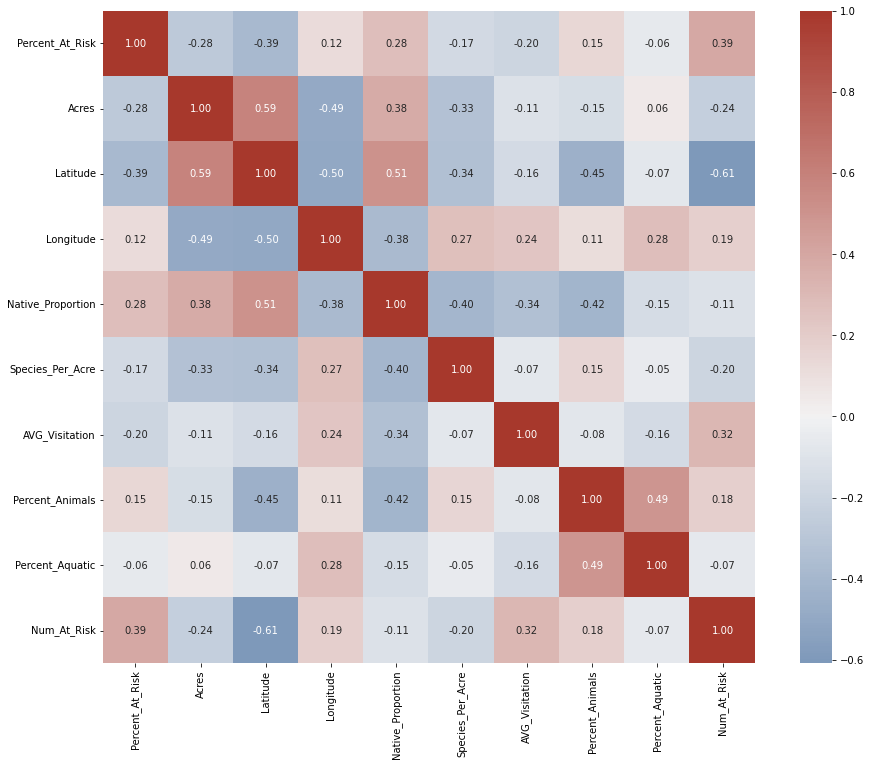

In [213]:
#Reorganize the column order 
parks_correlation = parks[['Percent_At_Risk', 'State', 'Acres', 'Latitude', 'Longitude',
       'Native_Proportion', 'Species_Per_Acre', 
       'AVG_Visitation', 'Percent_Animals', "Percent_Aquatic", 'Num_At_Risk']]

plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)

sns.heatmap(parks_correlation.corr(), center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap)

This is the correlation matrix between our features. There are several points of interest, specifically many variables that are both positively and negatively correlated to latitude. There is a significant positive correlation between latitude and both native proportion and acreage, but a significant negative correlation between latitude and the number of species at risk. This indicates that northern national parks tend to be larger in size, have a higher proportion of native species, and have a lower number of species at risk, which is a very interesting trend we will explore more in our modeling.

## Feature Distributions Side by Side

We compiled all of our feature distributions above into one plot to make it easier to compare

In [219]:
from plotly.subplots import make_subplots
fig = make_subplots(
    rows=4, cols=2,
    subplot_titles=("Percent_At_Risk","Species_Per_Acre", "Native_Proportion", 
                    "Percent_Animals", "Percent_Aquatic", "AVG_Visitation", "Ozone")
)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['Percent_At_Risk']),
              row=1, col=1)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['Species_Per_Acre']),
              row=1, col=2)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['Native_Proportion']),
              row=2, col=1)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['Percent_Animals']),
              row=2, col=2)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['Percent_Aquatic']),
              row=3, col=1)
fig.add_trace(go.Bar(x=parks['Park Name'],y=parks['AVG_Visitation']),
              row=3, col=2)
fig.add_trace(go.Bar(x=ozone_visitation['Park Name'],y=ozone_visitation['Total']),
              row=4, col=1)

fig.update_layout(height=1700, showlegend=False)

fig.show()

# Modelling

## Principal Component Analysis

In [220]:
parks_pca = parks[['Acres','Latitude','Longitude','AVG_Visitation','Native_Proportion','Species_Per_Acre', "Percent_Animals", "Percent_Aquatic"]]
parks_pca.head()

,Acres,Latitude,Longitude,AVG_Visitation,Native_Proportion,Species_Per_Acre,Percent_Animals,Percent_Aquatic
0,47390,44.35,-68.21,2889149.0,0.763181,0.024752,0.257460,0.145695
1,76519,38.68,-109.57,1356430.0,0.887850,0.009801,0.334667,0.059761
2,242756,43.75,-102.50,945143.0,0.688053,0.003749,0.400000,0.054945
3,801163,29.25,-103.25,379312.0,0.945798,0.002510,0.299851,0.086235
4,172924,25.65,-80.08,503466.0,0.788095,0.007697,0.667168,0.627252


In [221]:
parks_pca_centered = parks_pca - np.mean(parks_pca, axis=0)
parks_pca_centered_stds = np.std(parks_pca_centered, axis = 0)
parks_standardized = parks_pca_centered/parks_pca_centered_stds
parks_standardized.head()

,Acres,Latitude,Longitude,AVG_Visitation,Native_Proportion,Species_Per_Acre,Percent_Animals,Percent_Aquatic
0,-0.515824,0.278140,2.003108,0.894615,-0.832972,0.432501,-0.714627,0.269323
1,-0.498782,-0.242558,0.158989,0.033477,0.259845,-0.233967,-0.075908,-0.455749
2,-0.401524,0.223039,0.474219,-0.197599,-1.491517,-0.503793,0.464581,-0.496383
3,-0.074825,-1.108551,0.440779,-0.515504,0.767796,-0.559003,-0.363932,-0.232370
4,-0.442380,-1.439153,1.473860,-0.445749,-0.614579,-0.327780,2.674801,4.332461


In [222]:
u, s, vt = np.linalg.svd(parks_standardized, full_matrices = False)

In [223]:
parks_1st_2_pcs = pd.DataFrame(data = (u*s)[:,0:2],columns=['pc1','pc2'])
parks_1st_2_pcs.head()

,pc1,pc2
0,-1.351118,0.963631
1,-0.107023,0.472836
2,-0.796347,0.114925
3,0.001014,0.152944
4,-3.075252,-4.219213


In [224]:

park_names = list(parks['Park Name']) 
parks_1st_2_pcs['Park Name'] = park_names
parks_1st_2_pcs['Percent_At_Risk'] = parks['Percent_At_Risk']

fig = px.scatter(parks_1st_2_pcs, x="pc1", y="pc2", 
                 text='Park Name', 
                 color='Percent_At_Risk', 
                 color_continuous_scale="YlOrRd",
                 title="The First Two Principle Components Colored by the Percentage of At-Risk Species in Each Park"
                 ); 

fig.update_traces(textposition='top right', marker=dict(size=9));
fig.update_layout(width=1500, height=1100);
fig.show();

The plot above of the first two principal components shows commonalities in clusters by location, indicating that location (Latitude/Longitude) is a big factor in determining various factors about the biodiversity of our parks. As shown on the far right, Alaskan national parks are clustered together (Denali, Glacier Bay, Lake Clark, etc.), while parks in Utah such as Bryce Canyon, Capitol Reef, Arches, etc. are very close together.

Here we see that the first principle component is largely driven by latitude. For example, Northern parks such as the Alaskan parks are all located to the right of the PCA plot, whereas southern parks such as those in Florida are concentrated to the left. The second principle component is less clear. Parks with a high number of annual visitors such as Great Smoky Mountains NP, Yosemite, and Zion seem to be found near the top of the plot. Additionally, parks with higher percentages of marine animals are found at the bottom of the plot. 


Text(0.5, 1.0, 'Fraction of Variance Explained by each Principal Component')

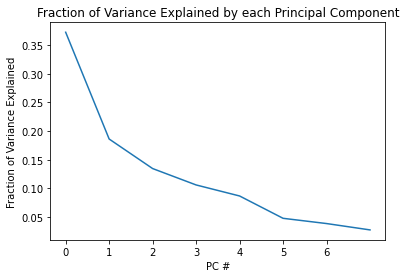

In [225]:
plt.plot(range(8), s**2 / sum(s**2));
plt.xticks(range(7), range(7));
plt.xlabel('PC #');
plt.ylabel('Fraction of Variance Explained');
plt.title('Fraction of Variance Explained by each Principal Component')

In [226]:
loadings = (u*s)*(s**2 / sum(s**2))**0.5

We also plot and alternative PCA plot with loadings included and park category as color:

In [227]:
fig = px.scatter((u*s), x=0, y=1, color=parks['Park_Type'], title="Biplot with First Two PCs Colored by Park Type")
fig.update_xaxes(title_text='PC0')
fig.update_yaxes(title_text='PC1')
fig.update_layout(
    autosize=False,
    width=1400,
    height=1200,)
for i, feature in enumerate(parks_pca.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        yshift=10,
        ax=0, ay=0,
        xanchor="auto",
        yanchor="bottom",
        text=feature,
    )
fig.show()

This alternative representation of the first to PCs shows that parks are roughly clustering by the park biome types that we assigned. For instance, desert parks are clustering in the middle, forested parks on the left, and alpine parks on the right. 

## K-Means Clustering 

K-Means is an unsupervised machine learning algorithm whose objective is to group similar data points together and discover underlying patterns. K-means looks for a fixed number of clusters in the dataset.  A cluster is defined as a collection of data points aggregated because of certain similarities. The selected loss function used for the k-means clustering is inertia which consists of the sum of squared distances from each data point to its center. 


In [228]:
parks_kmeans = parks[['Native_Proportion','Species_Per_Acre', "Percent_Animals", "Percent_Aquatic", "Percent_At_Risk"]]
parks_kmeans = parks_kmeans.set_index(parks["Park Name"])
parks_kmeans.head()

,Native_Proportion,Species_Per_Acre,Percent_Animals,Percent_Aquatic,Percent_At_Risk
Park Name,,,,,
Acadia,0.763181,0.024752,0.257460,0.145695,0.040921
Arches,0.887850,0.009801,0.334667,0.059761,0.069333
Badlands,0.688053,0.003749,0.400000,0.054945,0.061538
Big Bend,0.945798,0.002510,0.299851,0.086235,0.063650
Biscayne,0.788095,0.007697,0.667168,0.627252,0.044328


In [229]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np

X= parks_kmeans.copy()
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

inertia = []
for i in range(1,11):
    kmeans1 = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans1.fit(X)
    inertia.append(kmeans1.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",
                  xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                  width=500,
                  height=500,
                 annotations=[
        dict(
            x=4,
            y=inertia[3],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])


As can be seen in this graph our plot does not have an abundantly clear elbow (as is often the case with complex real-world datasets). We chose k=4 as the most likely elbow, as this number of clusters also makes it easier to compare the clusters outputted by k-means with the 4 ecological clusters we assigned to the parks ourselves. 
 


In [230]:
from sklearn.cluster import KMeans
kmeans = KMeans(
        n_clusters=4, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=parks_kmeans.columns, index=parks_kmeans.index)

clusters['Biodiversity Category']=kmeans.labels_
polar=clusters.groupby("Biodiversity Category").mean().reset_index()
polar=pd.melt(polar,id_vars=["Biodiversity Category"])
fig = px.line_polar(polar, r="value", theta="variable", color="Biodiversity Category", line_close=True,height=800,width=1400,
                     title="Mean Values of Each Feature by Cluster",
                     color_discrete_map={
                      0: "#00cc96",
                      1: "#ef553b",
                      2: "#636efa",
                      3: "#19d3f3",
                      })
fig.update_layout(title={
        'text': "Average Value of Each Feature in Each K-Means Cluster",
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},

        legend=dict(
          yanchor="top",
          y=0.99,
          xanchor="right",
          x=0.84
            )
        )

fig.add_annotation(xref='paper',
                  yref='paper',
                  x=0.5, y=-0.25,
                  showarrow=False,
                  text ='This is my caption for the Plotly figure')
fig.show()

Parks clustered into category 0 are marked by relatively high species density (species per acre) compared to the other categories, and a fairly low percentage of native species (meaning that there is a significant amount of invasive species in the park). Parks in this category include most of the midwestern, southeastern, and Hawaiian parks. These largely fall into the “forested” and “tropical” ecosystem categories we assigned. However, Rocky Mountain NP was also included in this category, despite being very different from the rest in terms of biome (it is a primarily alpine environment). Based on these attributes, the NPS should focus their invasive species removal efforts on parks in this category, since that seems to be their primary conservation issue. 

Parks in category 1 are marked by having the highest percentage of at-risk species out of any of the categories. These primarily overlap with the parks in the “desert” ecosystem category (hence the low proportion of aquatic animals). One surprise in this category is Redwood National Park in Northern California, which is quite lush and forested compared to the primarily dry, desert parks that make up the rest of the category. The NPS should focus their conservation efforts here on protecting endangered and other at-risk species, since this is where the highest proportion of them can be found.

Category 2 does not have a central, defining feature. The parks in the category have very low species density, a relatively low percentage of at-risk species, few marine animals, and almost solely contain native species. These parks mostly overlap with alpine parks and more northern forested parks. Grand Canyon National Park is one exception, as most would consider it to bear more resemblance to other desert parks such as nearby Bryce Canyon and Zion.  The NPS service likely does not need to do as much specific biodiversity conservation efforts in these parks, since they are naturally not as rich in biodiversity to begin with and the relatively few species that do exist there do not appear to be under immediate threat. 

Finally, category 4 contains only the parks in southern Florida: Dry Tortugas, Biscayne Bay, and the Everglades. These parks are unique in that they are primarily covered by water (hence the high proportion of aquatic animals). For example, the area of Biscayne Bay NP is 95% water, the remaining 5% being made up by strings of small islands.8 It is likely that the biodiversity conservation needs of these marine ecosystems are very different from that of the land-based parks, so it is logical that they would be clustered separately from all the rest. 


In [232]:
clusters_for_map = parks[["Latitude", "Longitude"]]
clusters_for_map = clusters_for_map.set_index(parks_kmeans.index)
clusters_for_map["Biodiversity Category"] = clusters["Biodiversity Category"].astype(str)

import plotly.express as px
fig = px.scatter_geo(clusters_for_map, 
                     locationmode="USA-states",
                     lat = "Latitude",
                     lon="Longitude",
                     color="Biodiversity Category",
                     scope="usa",
                     color_discrete_map={
                      "0": "#00cc96",
                      '1': "#ef553b",
                      '2': "#636efa",
                      '3': "#19d3f3",
                      }
                     )
fig.update_traces(marker=dict(size=7)),
fig.update_layout(title={
        'text': "Map of US National Parks by K-Means Cluster",
        'y':0.9,
        'x':0.50,
        'xanchor': 'center',
        'yanchor': 'top'},

        legend=dict(
          yanchor="top",
          y=0.6,
          xanchor="right",
          x=0.73
            )
        )
fig.update_geos(
    resolution=50,
    showocean=False, oceancolor="#d6e9f8",
    showlakes=True, lakecolor="#d6e9f8",
    showrivers=True, rivercolor="#d6e9f8"
)
fig.show()

Given the category defined by the K-Means cluster their are geographically represented in the map above. 

In [233]:
import plotly.express as px
fig = px.scatter_geo(parks, 
                     locationmode="USA-states",
                     lat = "Latitude",
                     lon="Longitude",
                     text="Park Name",
                     color="Park_Type",
                     scope="usa",
                     color_discrete_sequence=["#158f00", "#fa6000", "#00d7eb", "#32328b"],
                     title="Map of US National Parks by Type"
                     )

fig.update_traces(marker=dict(size=7)),
fig.update_layout(title={
        'text': "Map of US National Parks by Primary Ecosystem Type",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'},

          legend=dict(
          yanchor="top",
          y=0.6,
          xanchor="right",
          x=0.73
            )
        )
fig.update_geos(
    resolution=50,
    showland=True, landcolor="#f9f1ec",
    showocean=False, oceancolor="#d6e9f8",
    showlakes=True, lakecolor="#d6e9f8",
    showrivers=True, rivercolor="#d6e9f8"
)
fig.show()

In [234]:
import plotly.express as px
fig = px.scatter_geo(parks, 
                     locationmode="USA-states",
                     lat = "Latitude",
                     lon="Longitude",
                     text="Park Name",
                     color="Percent_At_Risk",
                     scope="usa",
                     title="Map of US National Parks by Type",
                     color_continuous_scale="YlOrRd",
                     size="Percent_At_Risk"

                     )

fig.update_traces(marker=dict(size=7)),
fig.update_layout(title={
        'text': "Map of US National Parks by Percentage of At-risk Species",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'}
        )
fig.update_geos(
    resolution=50,
    # showland=True, landcolor="#f9f1ec",
    showocean=False, oceancolor="#d6e9f8",
    showlakes=True, lakecolor="#d6e9f8",
    showrivers=True, rivercolor="#d6e9f8"
)
fig.show()

In [235]:
clusters_for_map = parks[["Latitude", "Longitude"]]
clusters_for_map = clusters_for_map.set_index(parks_kmeans.index)
clusters_for_map["kmeans_label"] = clusters["Biodiversity Category"].astype(str)
clusters_for_map = clusters_for_map.reset_index()
temp_parks = parks.reset_index()
clusters_for_map["Percent_At_Risk"] = temp_parks['Percent_At_Risk']
fig = px.scatter_geo(clusters_for_map, 
                     locationmode="USA-states",
                     lat = "Latitude",
                     lon="Longitude",
                     size = 'Percent_At_Risk',
                     text="Park Name",
                     color="kmeans_label",
                     scope="usa",
                     )
fig.update_layout(title={
        'text': "Map of US National Parks by Percentage of At-risk Species",
        'y':0.9,
        'x':0.47,
        'xanchor': 'center',
        'yanchor': 'top'}
        )
fig.update_geos(
    resolution=50,
    #showland=True, landcolor="#f9f1ec",
    showocean=False, oceancolor="#d6e9f8",
    showlakes=True, lakecolor="#d6e9f8",
    showrivers=True, rivercolor="#d6e9f8", 
    
  
)
fig.show()

Map of the species at risk based on the labels created by the K-Means Clusters. In this map it easier to identify where the clusters are located in a geological area and the size of the bubbles represt the percent_at risk. This helps us understand that parks that are categorized as Orange or label 1 are the ones that are more in danger to lose biodiversity.

## Regression

Our team was also interested in exploring how we can use our features to predict the percentage of at risk species in each park. We decided to use both a linear regressor and a random forest regressor so that we can compare the two models. We used the following features for both these regressors: Acres, Latitude, Longitude, AVG_Visitation, Native_Proportion, Species_Per_Acre, Percent_Animals, Percent_Aquatic.

Root mean square error (RMSE) is defined as the average magnitude of the error and it is particularly used when large errors are highly undesirable. Since the data points for our regression are limited we decided to use this to judge our results.  We also used the  R2  metric to evaluate how well the linear regression fit the data. The R2  will reveal the percentage of the response variable variation that is explained by the linear model.

We looked that the coefficients / feature importances in our trained models to determine what features played the most important role in predicting biodiversity loss. 


### Linear Regression


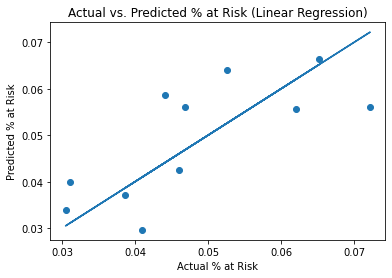

R^2:  0.4762508861250325
RMSE:  0.009371449658268766


In [241]:
X_parks = parks[['Acres','Latitude','Longitude','AVG_Visitation','Native_Proportion','Species_Per_Acre','Percent_Animals', "Percent_Aquatic"]]
y_parks = parks[["Percent_At_Risk"]]

X_train, X_test, y_train, y_test = train_test_split(X_parks, y_parks, test_size=0.2, random_state=326)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted % at Risk (Linear Regression)')
plt.xlabel('Actual % at Risk')
plt.ylabel('Predicted % at Risk')
plt.plot(y_test,y_test)
plt.show()
print('R^2: ',r2_score(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred)**0.5)

Our linear regression model achieved an R2 value of 0.48, meaning that 48% of the variance in % at risk could be explained using our features. We achieved an RMSE of 0.009, meaning the standard deviation of the unexplained variance is 0.9 percentage points. On the scale of single-digit percentage points that is used for % at risk, this RMSE of just shy of 1 percentage point is rather high and makes this model a rather poor predictor of % at risk. Again, it is very difficult to create an effective model on such limited data.

In [242]:
coefs = pd.Series(lr.coef_[0], index=X_train.columns).sort_values(ascending=False)
px.bar(coefs, x=coefs.index, y=coefs.values, title="Linear Regression Coefficients")

The most important feature in predicting % at risk is specie per acre and the correlation and while there is a negative correlation the data limitation prevents us from drawing definite conclusions. Interestingly, the native proportion shows the second highest feature which makes sense since in our correlation matrix the correlation was also negatively correlated. The rest of the variables did not show signinficant relationship with determining the percent of species at risk. 

### Random Forest Regressor

In [243]:
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



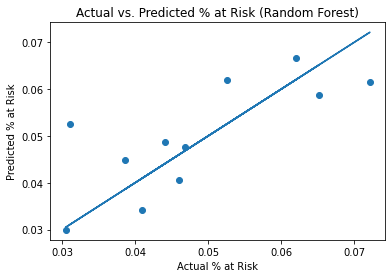

R^2:  0.5336911280981863
RMSE:  0.008842640421256688


In [244]:
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted % at Risk (Random Forest)')
plt.xlabel('Actual % at Risk')
plt.ylabel('Predicted % at Risk')
plt.plot(y_test,y_test)
plt.show()
print('R^2: ',r2_score(y_test, y_pred))
print('RMSE: ',mean_squared_error(y_test,y_pred)**0.5)

Our R2 value of 0.52 is a slight improvement over the linear regression model, meaning that just over half the variance in % at risk could be explained using our features. We achieved a slightly lower, but still high RMSE just shy of 0.009. On the scale of our dependent variable, this is a rather high error, making our model, again, a poor predictor of % at risk, likely due to our limited dataset. Random forest, unlike linear regression, has bootstrapping of our sample data integrated into the model itself, as it is an ensemble model that relies on bagging (bootstrap aggregating) our features. 

In [245]:
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
fig = px.bar(feature_importances, x=feature_importances.index, y=feature_importances.values, title="Random Forest Regressor Feature Importances", labels={'x': 'Features', 'y': 'Coef'})
fig.show()

The most important feature in predicting % at risk is latitude, which makes sense given how latitude had the highest absolute coefficient of correlation (very negatively correlated) with % at risk compared to the other features in our model. Interestingly, the percentage of species that are aquatic is the second most important feature despite very little correlation with % at risk in the correlation matrix, but the correlation matrix also shows that % aquatic has the lowest correlations with any of the other features, increasing its relevance as a distinguishing feature when performing random forest.